1. Data Loading and Exploration:

Loaded a time series dataset od Daily Climate then ploted it, and identified trends, seasonality, or irregular patterns.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Data Loading and Exploration:
from google.colab import files
x = files.upload()

Saving DailyDelhiClimateTest.csv to DailyDelhiClimateTest (3).csv


In [ ]:
file_path = list(x.keys())[0]
data = pd.read_csv(file_path)

# Display first few rows
print("Dataset Head:")
print(data.head())

Dataset Head:
         date   meantemp   humidity  wind_speed  meanpressure
0  2017-01-01  15.913043  85.869565    2.743478     59.000000
1  2017-01-02  18.500000  77.222222    2.894444   1018.277778
2  2017-01-03  17.111111  81.888889    4.016667   1018.333333
3  2017-01-04  18.700000  70.050000    4.545000   1015.700000
4  2017-01-05  18.388889  74.944444    3.300000   1014.333333


In [ ]:
print("Dataset Info:")
print(data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          114 non-null    object 
 1   meantemp      114 non-null    float64
 2   humidity      114 non-null    float64
 3   wind_speed    114 non-null    float64
 4   meanpressure  114 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.6+ KB
None


Exploration:

Convert the date column to datetime and set it as the index, ensuring that the data is prepared for time series analysis. A visual inspection is required to understand the underlying behavior of the time series.

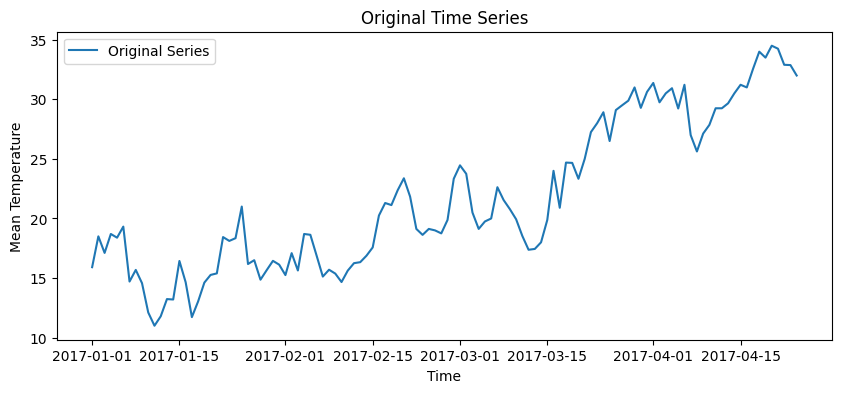

In [ ]:
# Exploration:
# Convert the date column and set it as index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Select the temperature column as the time series
time_series = data['meantemp']

# Plot the time series
plt.figure(figsize=(10, 4))
plt.plot(time_series, label='Original Series')
plt.title('Original Time Series')
plt.xlabel('Time')
plt.ylabel('Mean Temperature')
plt.legend()
plt.show()

2. Time Series Decomposition:

Decomposition provides insight into the individual components, thus helping in better modeling and forecasting. The trend is the long-term pattern or direction in the movement of data over time. Seasonality describes the regular fluctuations or periodic variations in a fixed period. Residuals account for those noisy or irregular variations not captured by either the trend or the seasonality.

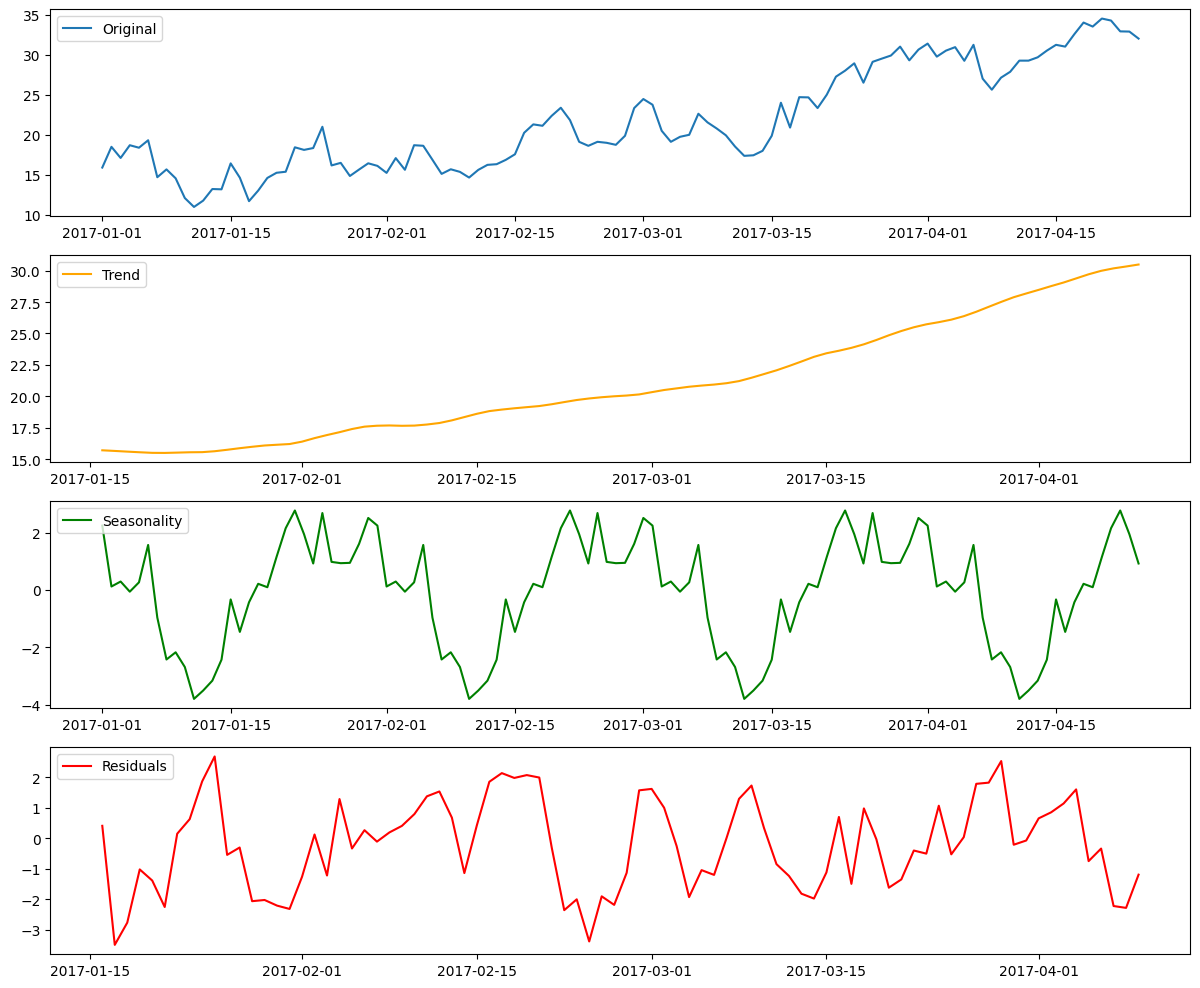

In [ ]:
# Time Series Decomposition:
# Perform time series decomposition on the 'meantemp' column
decomposition = seasonal_decompose(data['meantemp'], model='additive', period=30)

# Plot the decomposed components
plt.figure(figsize=(12, 10))

plt.subplot(411)
plt.plot(data['meantemp'], label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

3. Trend Estimation:

Simple Moving Average (SMA) averages out the data over a fixed window, weighting all the observations equally and Weighted Moving Average (WMA) progressively applies greater weights to near observations, placing more emphasis on those. Trend analysis helps isolate the overall direction, which is crucial for forecasting.

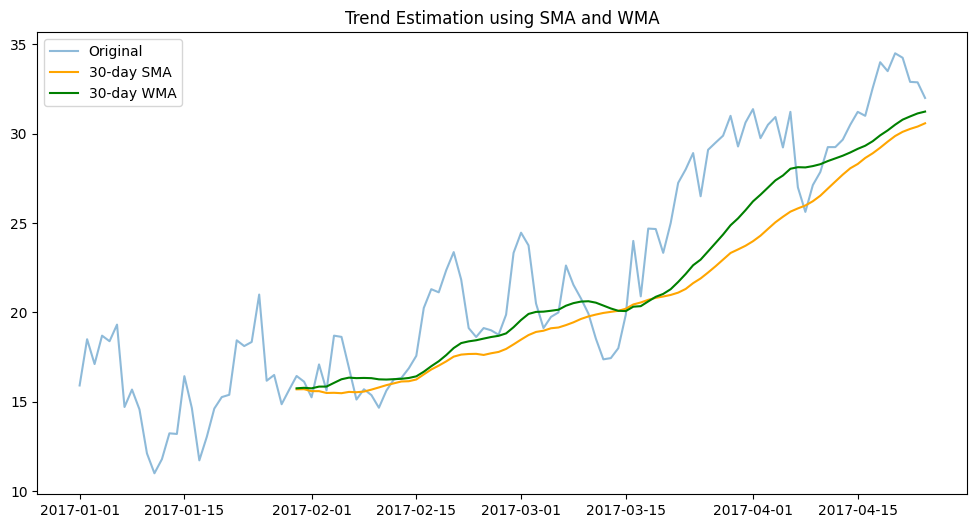

In [ ]:
# Trend Estimation:
# Simple Moving Average (SMA)
data['SMA_30'] = data['meantemp'].rolling(window=30).mean()  # 30-day SMA

# Weighted Moving Average (WMA)
weights = list(range(1, 31))  # Weights for 30 days
def weighted_moving_average(series, weights):
    return series.rolling(window=len(weights)).apply(lambda x: sum(x * weights) / sum(weights), raw=True)

data['WMA_30'] = weighted_moving_average(data['meantemp'], weights)

# Plot SMA and WMA
plt.figure(figsize=(12, 6))
plt.plot(data['meantemp'], label='Original', alpha=0.5)
plt.plot(data['SMA_30'], label='30-day SMA', color='orange')
plt.plot(data['WMA_30'], label='30-day WMA', color='green')
plt.title('Trend Estimation using SMA and WMA')
plt.legend(loc='upper left')
plt.show()

4. Exponential Smoothing:

Single Exponential Smoothing (SES) represents and models only the level component of a time series. Holt's method otherwise expatiates SES to model both level and trend, conventionally known as Double Exponential Smoothing. The method of Holt-Winters otherwise makes an embedding for level, trend, and seasonality on, which is conventionally called Triple Exponential Smoothing. It is also widely used in short-term or medium-term forecasting-exponential smoothing methods-particularly in series which are trended or seasonal.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
<ipython-input-8-2d2026ff1876>:7: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = ExponentialSmoothing(data['meantemp'], trend='add').fit(smoothing_level=0.2, smoothing_slope=0.1)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


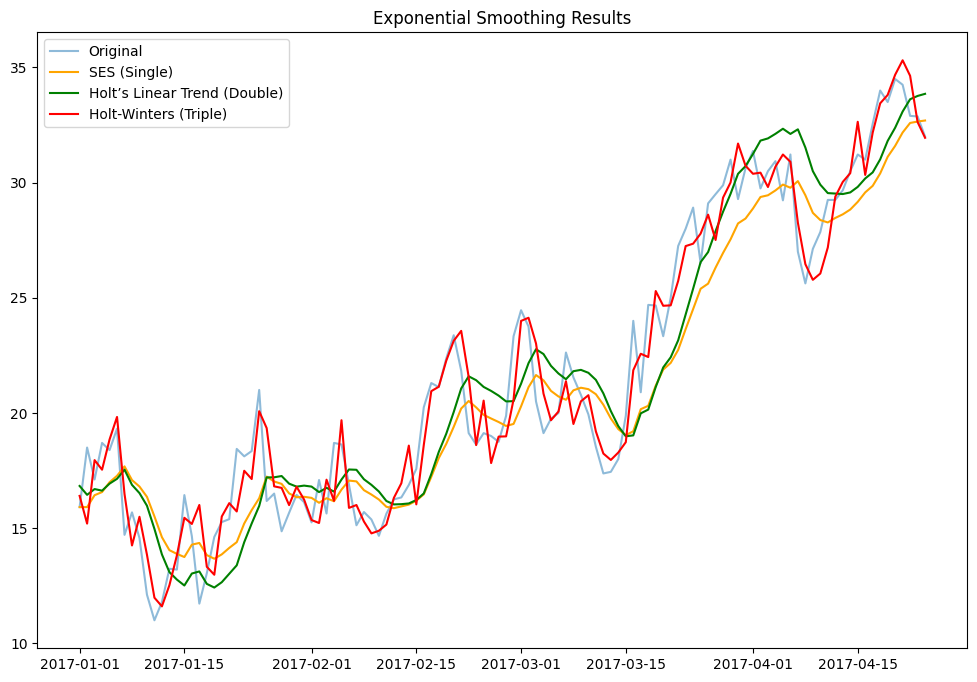

In [ ]:
# Exponential Smoothing:
# Single Exponential Smoothing (SES)
ses_model = SimpleExpSmoothing(data['meantemp']).fit(smoothing_level=0.2, optimized=False)
data['SES'] = ses_model.fittedvalues

# Double Exponential Smoothing (Holt's Linear Trend)
holt_model = ExponentialSmoothing(data['meantemp'], trend='add').fit(smoothing_level=0.2, smoothing_slope=0.1)
data['Holt'] = holt_model.fittedvalues

# Triple Exponential Smoothing (Holt-Winters)
holt_winters_model = ExponentialSmoothing(data['meantemp'], trend='add', seasonal='add', seasonal_periods=30).fit()
data['Holt_Winters'] = holt_winters_model.fittedvalues

# Plot Exponential Smoothing Results
plt.figure(figsize=(12, 8))
plt.plot(data['meantemp'], label='Original', alpha=0.5)
plt.plot(data['SES'], label='SES (Single)', color='orange')
plt.plot(data['Holt'], label='Holt’s Linear Trend (Double)', color='green')
plt.plot(data['Holt_Winters'], label='Holt-Winters (Triple)', color='red')
plt.title('Exponential Smoothing Results')
plt.legend(loc='upper left')
plt.show()

5. Forecasting with AR, ARIMA, SARIMA:

In addition, the AutoRegressive Integrated Moving Average (ARIMA) model integrates autoregression, which contains the difference for stationarity, besides the moving average. For an order of 5, 1, and 2, the indication shows 5 lags on AR, first-order difference, and 2 on MA lags. It finds wide application in forecasting non-seasonal time series, because ARIMA is flexible enough to handle both trend and irregularity.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


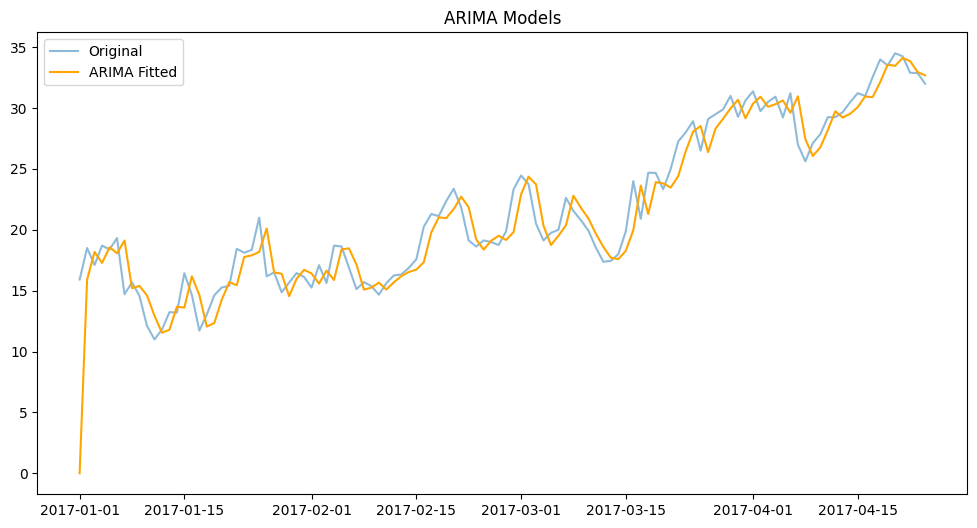

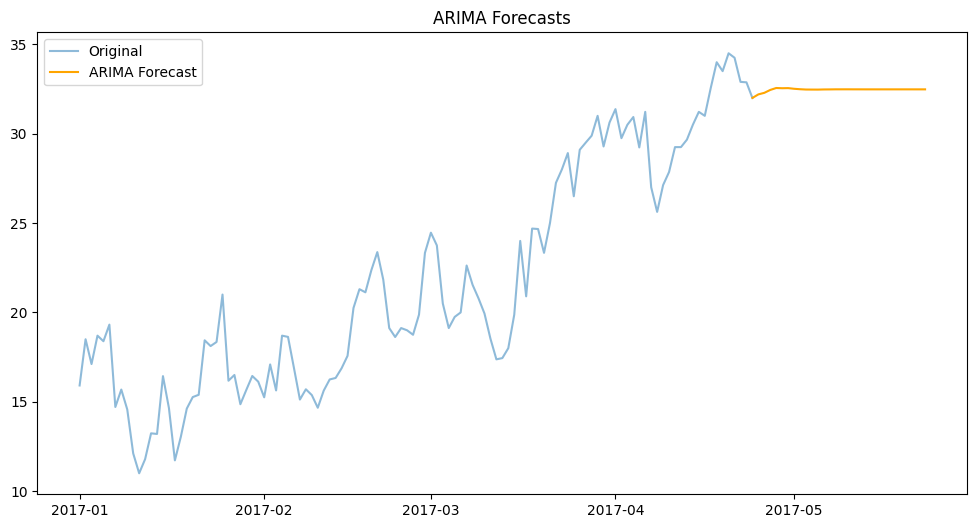

In [ ]:
# Forecasting with ARIMA
# Fit ARIMA model
arima_model = ARIMA(data['meantemp'], order=(5, 1, 2))
arima_results = arima_model.fit()
data['ARIMA_Fitted'] = arima_results.fittedvalues

# Plot ARIMA results
plt.figure(figsize=(12, 6))
plt.plot(data['meantemp'], label='Original', alpha=0.5)
plt.plot(data['ARIMA_Fitted'], label='ARIMA Fitted', color='orange')
plt.legend(loc='upper left')
plt.title('ARIMA Models')
plt.show()

# Forecast future values
future_arima = arima_results.forecast(steps=30)

# Plot forecasts
plt.figure(figsize=(12, 6))
plt.plot(data['meantemp'], label='Original', alpha=0.5)
plt.plot(pd.date_range(data.index[-1], periods=30, freq='D'), future_arima, label='ARIMA Forecast', color='orange')
plt.legend(loc='upper left')
plt.title('ARIMA Forecasts')
plt.show()

The Seasonal AutoRegressive Integrated Moving Average (SARIMA) model extends ARIMA to handle seasonality by incorporating seasonal autoregressive, differencing, and moving average components. Order (1, 1, 1) with seasonal order (1, 1, 1, 365) indicates regular lags, seasonal differencing, and a seasonal period of 365 days. SARIMA is best utilized for time series that contains both trends and strong seasonal patterns.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


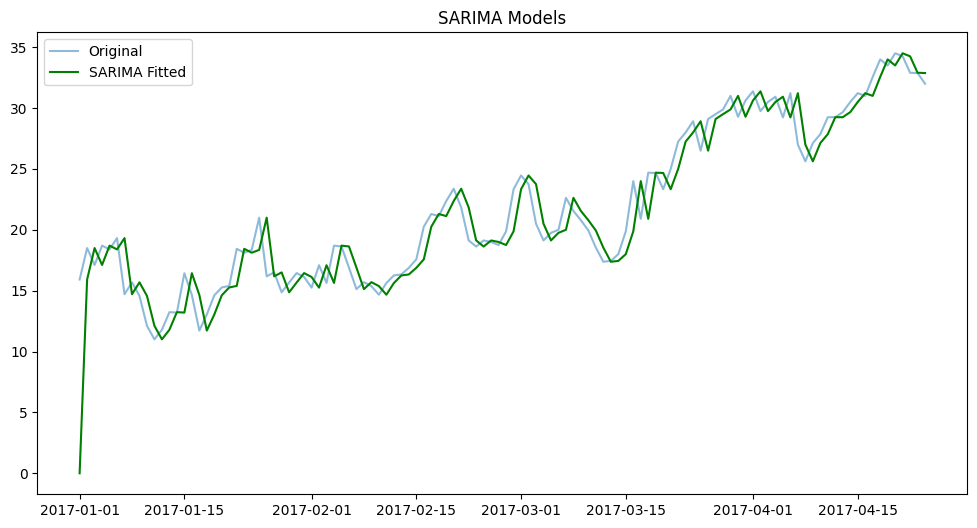

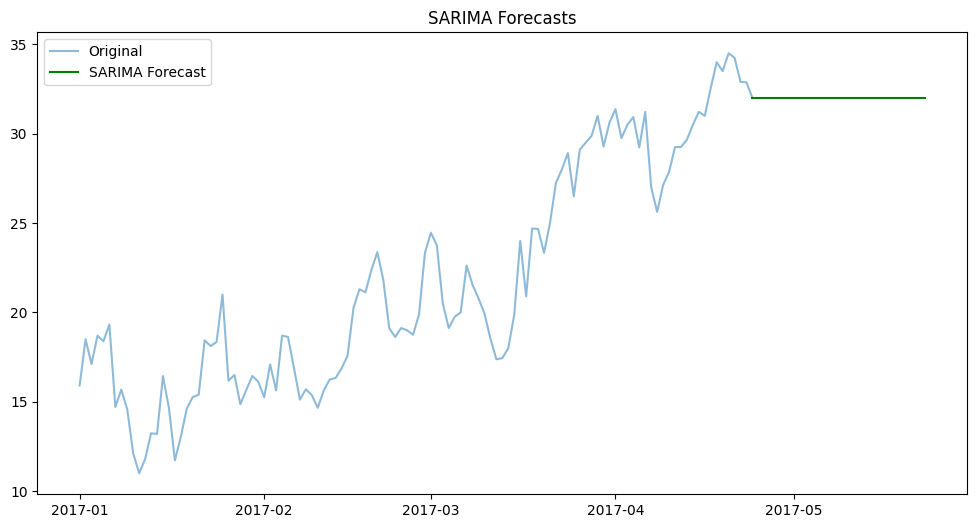

In [ ]:
# Forecasting SARIMA
# Fit SARIMA model
sarima_model = SARIMAX(data['meantemp'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 365))
sarima_results = sarima_model.fit()
data['SARIMA_Fitted'] = sarima_results.fittedvalues

# Plot SARIMA results
plt.figure(figsize=(12, 6))
plt.plot(data['meantemp'], label='Original', alpha=0.5)
plt.plot(data['SARIMA_Fitted'], label='SARIMA Fitted', color='green')
plt.legend(loc='upper left')
plt.title('SARIMA Models')
plt.show()

# Forecast future values
future_sarima = sarima_results.forecast(steps=30)

# Plot forecasts
plt.figure(figsize=(12, 6))
plt.plot(data['meantemp'], label='Original', alpha=0.5)
plt.plot(pd.date_range(data.index[-1], periods=30, freq='D'), future_sarima, label='SARIMA Forecast', color='green')
plt.legend(loc='upper left')
plt.title('SARIMA Forecasts')
plt.show()

6. Evaluation:

The Mean Absolute Error (MAE) calculates the average of the absolute differences between forecasted and actual values. The Root Mean Squared Error (RMSE), although similar, is weighted toward larger errors since it squares the differences before taking an average. MAE and RMSE provide quantitative measures to compare the performance of models. Lower values correspond to better models.

The best-performing model is Holt-Winters with the lowest RMSE of 1.30 and MAE of 1.01. This indicates that Holt-Winters provides the most accurate forecasts for the given time series. The Holt-Winters model is the best because, from the obtained results of this time series, the error metrics are small. Besides, since it accounts for seasonality with trend and level, this kind of model ensures that the forecast will be precise and reliable.

In [ ]:
# Evaluation:
# Define true and fitted values for each model
true_values = data['meantemp'].dropna()
import math
metrics = {
    "Model": ["SES", "Holt", "Holt-Winters", "ARIMA", "SARIMA"],
    "MAE": [
        mean_absolute_error(true_values, data['SES']),
        mean_absolute_error(true_values, data['Holt']),
        mean_absolute_error(true_values, data['Holt_Winters']),
        mean_absolute_error(true_values, data['ARIMA_Fitted']),
        mean_absolute_error(true_values, data['SARIMA_Fitted']),
    ],
    "RMSE": [
        math.sqrt(mean_squared_error(true_values, data['SES'])),
        math.sqrt(mean_squared_error(true_values, data['Holt'])),
        math.sqrt(mean_squared_error(true_values, data['Holt_Winters'])),
        math.sqrt(mean_squared_error(true_values, data['ARIMA_Fitted'])),
        math.sqrt(mean_squared_error(true_values, data['SARIMA_Fitted'])),
    ]
}

# Convert metrics to DataFrame for better visualization
metrics_df = pd.DataFrame(metrics)
from IPython.display import display
display(metrics_df)

# Summary of the Best-Performing Method
print("Model Evaluation Metrics:")
print(metrics_df)

best_model = metrics_df.loc[metrics_df['RMSE'].idxmin()]
print("\nBest-Performing Model:")
print(best_model)

# Summarize why the best model was chosen
summary = f"The best-performing model is {best_model['Model']} with the lowest RMSE of {best_model['RMSE']:.2f} and MAE of {best_model['MAE']:.2f}. This indicates that {best_model['Model']} provides the most accurate forecasts for the given time series."
print(summary)

,Model,MAE,RMSE
0,SES,1.905158,2.297943
1,Holt,1.964563,2.354426
2,Holt-Winters,1.012748,1.302900
3,ARIMA,1.446198,2.218156
4,SARIMA,1.445664,2.247688


Model Evaluation Metrics:
          Model       MAE      RMSE
0           SES  1.905158  2.297943
1          Holt  1.964563  2.354426
2  Holt-Winters  1.012748  1.302900
3         ARIMA  1.446198  2.218156
4        SARIMA  1.445664  2.247688

Best-Performing Model:
Model    Holt-Winters
MAE          1.012748
RMSE           1.3029
Name: 2, dtype: object
The best-performing model is Holt-Winters with the lowest RMSE of 1.30 and MAE of 1.01. This indicates that Holt-Winters provides the most accurate forecasts for the given time series.
